In this file, we produce a visualization of the corpus of texts based on its semantic context.

We summarize each text by a vector.

The visualization is obtained with kmeans clustering and PCA.

https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

# Import gensim 

In [1]:
import gensim.downloader as api
import gensim

# Import texts

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv", usecols=['story_html'])

In [4]:
from bs4 import BeautifulSoup
def get_story(row):
    # extracting story from html
    html = row['story_html']
    soup = BeautifulSoup(html, "html.parser")
    row['story'] = soup.get_text()
    return row


In [5]:
stories = df.apply(get_story, axis=1)[['story']]

In [6]:
texts = stories.story.to_list()

# Train the model

In [7]:
def read_corpus(text, tokens_only=False):
      for i, line in enumerate(text):
          tokens = gensim.utils.simple_preprocess(line)
          if tokens_only:
              yield tokens
          else:
              # For training data, add tags
              yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(texts))

In [8]:
len(train_corpus)

18248

In [9]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=5, epochs=10)

In [10]:
model.build_vocab(train_corpus)

In [11]:
%%time
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 16min 13s, sys: 6.81 s, total: 16min 20s
Wall time: 8min 45s


A few examples:

In [12]:
vector1 = model.infer_vector(['rat'])
print(vector1)

[-0.00028551 -0.00857184  0.01037268  0.00693584 -0.08809856 -0.08779433
 -0.12161116  0.04784663 -0.08825184 -0.03733197 -0.03574497 -0.01973002
  0.09468692 -0.02226037  0.0190661   0.06690324  0.00397203  0.03348624
  0.10174558  0.02743867  0.08825613  0.06501657 -0.10288417  0.01471154
  0.02526908 -0.03050199  0.10935216  0.06236402  0.10792499 -0.01704365
  0.07079046  0.05446685  0.09300351 -0.00995685 -0.07474986 -0.02688879
  0.01329137  0.0228958  -0.0117153  -0.01321074  0.01829609  0.0248468
 -0.07315603 -0.01684311  0.04963949 -0.05146542  0.04681132  0.03833691
 -0.07166122  0.10433557]


In [13]:
vector2 = model.infer_vector(['Jojo', 'is', 'a', 'rat'])
print(vector2)

[ 3.52473445e-02  4.06649336e-02  1.62622775e-04 -1.71750858e-02
 -2.61866357e-02 -7.42732435e-02 -7.83883780e-02  6.77780434e-02
 -1.14307195e-01 -1.61117613e-01 -1.07815668e-01 -2.35696174e-02
  2.94084065e-02 -7.72348046e-02 -4.01403382e-02  8.17911252e-02
 -4.33724083e-04  7.16086552e-02  1.04606017e-01  5.08446954e-02
  1.27009973e-01  6.73848316e-02 -9.20429975e-02  6.12418391e-02
 -1.42196054e-02 -3.53431478e-02  1.34626657e-01  4.38504070e-02
  1.12284459e-01  2.48062201e-02  6.70080632e-02  9.09825321e-03
  1.14149682e-01  2.86301263e-02 -1.19464062e-01 -6.68263882e-02
  3.45130861e-02  7.16688186e-02 -1.27902832e-02 -9.68835037e-03
 -1.56141911e-02  3.16999555e-02 -8.69699940e-02  1.71119813e-02
  7.19097033e-02 -9.23582390e-02  6.65409565e-02  4.04060632e-02
 -1.27460599e-01  1.67703763e-01]


In [14]:
import numpy as np
np.dot(vector1, vector2)

0.19589506

In [15]:
np.linalg.norm(vector1 - vector2)

0.27514708

# add features

In [16]:
len(vector1)

50

In [17]:
%%time

data = []
for i in range(len(train_corpus)):
  data.append(model.infer_vector(train_corpus[i].words))

CPU times: user 9min 22s, sys: 692 ms, total: 9min 22s
Wall time: 9min 25s


In [18]:
len(data)

18248

In [19]:
cols = [f'feat_{i}' for i in range(1,51)]

In [20]:
df_50 = pd.DataFrame(data, columns = cols)

In [21]:
df_50.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50
0,2.659484,-0.523605,-1.404203,-2.391710,-1.427656,1.256782,-0.262918,0.098928,-1.943198,-3.170513,...,-0.300519,-0.450661,1.022923,-0.465720,1.512374,2.292235,-0.304154,-1.089412,-1.146687,-0.330198
1,0.756721,-0.735245,0.930490,0.430159,0.920823,-0.517882,-1.637704,0.578778,0.981647,-1.794081,...,-0.862206,1.274044,-1.367507,0.929302,-0.290881,-0.791345,1.490387,0.367852,-1.791149,0.424740
2,-1.136603,-1.886631,-3.266066,0.037845,2.591342,0.640861,0.654232,0.792589,-0.929573,2.053419,...,-0.346342,1.235729,-2.328117,-1.659720,3.138215,-3.049757,2.102825,-0.147933,-2.446271,-0.291158
3,0.940223,0.204191,-1.529663,0.687877,-0.202320,-1.549609,-1.206502,0.506514,-1.014185,-0.249134,...,-1.428016,1.698065,1.434236,-0.135730,1.712987,-1.529778,1.497792,1.533599,0.306178,1.484685
4,1.288073,1.388954,2.586727,0.739471,0.513202,-2.528301,2.600472,5.204753,-1.283111,1.585567,...,2.196461,-0.102047,-0.109933,-0.258458,0.097764,-0.672371,1.226663,0.039536,-3.179453,0.666221


# Kmeans and PCA

In [22]:
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import StandardScaler


In [23]:
# choose the number of clusters
k = 4

# choose sample size
sample_size = 100

In [24]:
X = df_50[cols].head(sample_size)
scaler = StandardScaler()
scaler.fit(X)

X_ss = scaler.transform(X)
X = pd.DataFrame(data=X_ss, columns=X.columns)
# X = pd.DataFrame(data=X, columns=X.columns)

print(f'The shape of X is {X.shape}')



The shape of X is (100, 50)


In [25]:
titles = list(range(sample_size))

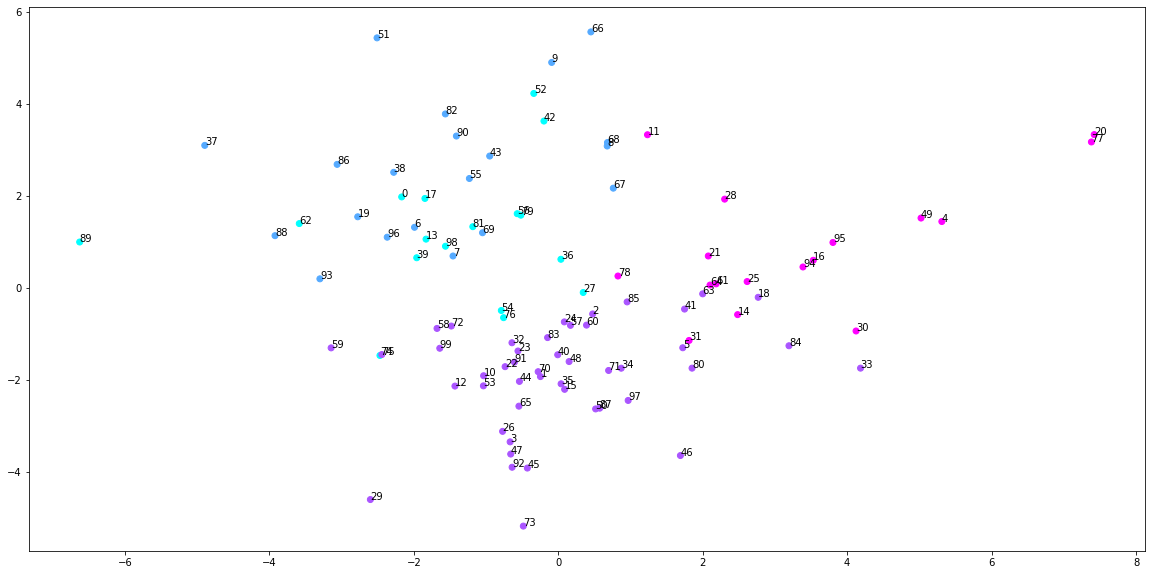

In [26]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

Stories 20 and 77 are very close, let's see why:

In [33]:
i=20
print(stories.story[i])


Disclaimer - this is not a real Greek myth, I made it up, although the characters are real in Greek mythology. Hope you enjoy.Pontus was pacing, nervously. His crab-claw horns snapping restlessly upon his head. He was walking next to his favourite body of water; the Aegean Sea, but even that didn’t seem to calm him. Not nearly enough people have heard of Pontus. Although most of those people have heard of his ‘all-powerful’, ‘master of the sea’ son, Poseidon. Pontus thought this begrudgingly. Who did those people think gave him those powers? You see, Pontus was the original sea god. Although, the term ‘sea god’ did not do Pontus justice at all, because, in fact, Pontus was the sea.With every pace along the Aegean Sea coast, the sea rippled, as though sensing Pontus’s stress. Not much made a god anxious, but a meeting with your mother would certainly do it. His mother was omnipotent but certainly not benevolent. She was an all-consuming, evil deity, named Gaia. However now, most people

In [32]:
i=77
print(stories.story[i])


The man’s face bore a pressed expression and his narrow boots, shifting ever so slightly in the sand, looked toward the jungle surrounding a blue mountain, whose summit was hidden by an evening mist. His ship lay anchored afar, and his men slushed through the gravity of frigid water behind him, their sheathed sabers clinking against their belts, strapped around foam drenched pale shirts and muddy breeches. “This is it here boys” whistled out from the captain’s cracked teeth, and his men, against the sharp crystal sea, looked forward in anguish; this being a so-far fruitless campaign having spanned several dreary months, armed ships were not far, and so they had at most five days to set camp, find treasure, load it on the ship, and to rapidly depart. 
A campfire was drawn in the center of the crescent-shaped beach, and the gentle lapping of waves blended into the chatter of men and the soft crackling of flames. The sun set down over the glistening sea, its purple rays dancing across th

3 and 26 too

In [35]:
i=3
print(stories.story[i])


 The Shiva, 1955
 
	For the rest of her life, the smell of pickles and pastrami would be the smell of death.
	Irene was 13 years old, and her mother was dead. Even after everything – the ambulance, the hospital, the horrible evidence of her relatives taking turns shoveling dirt onto the coffin, Irene couldn’t believe that her mother was really gone. Now there were all these people (so many people!) gathered back at the house, nibbling on plates of deli meat and coleslaw, talking about Mama in the past tense. For a moment, she wondered if it was all an elaborate joke they were playing on her. Maybe Millie was just outside, returning from an extended trip to the market, and she would suddenly burst through the door, arms full of grocery bags, shouting “Sorry I’m late!”
	But no, that couldn’t be right. Irene pictured the men, lifting the pine box out of the hearse, and she knew the truth. She slumped at the buffet that had been laid out on the dining room table, the stench of raw onions 

In [34]:
i=26
print(stories.story[i])


	“We’ve called you in here today to discuss the concerns that numerous parents have voiced over the past few weeks,” Scott said calmly to Nadia as he crossed one leg over the other. Nadia glanced at Scott, the head of Trinity Lincoln School, and then looked at the other members of the board in front of her. They were all coincidentally white, leaving Nadia as the sole, brown-skinned person in the room. Nadia couldn’t help but notice that her colleagues all somehow looked like someone jammed a pole right up each of their asses and they couldn’t quite get comfortable. She knew why she was called in here today. But she didn’t know why they needed six members of the faculty to speak to her about it. She felt like she was on trial for murder, not a teacher speaking to her supposed associates.  
 
	“Concerns?” Nadia asked innocently, deciding to take the naïve approach. She knew damned well that there were parents complaining about her. But that wasn’t her problem, it was theirs. If parents

In [36]:
df_pca_comps = pd.DataFrame(pca.components_, columns = X.columns)
tops_comps = pd.DataFrame(df_pca_comps.apply(lambda x:list(X.columns[np.array(x)\
                                        .argsort()[::-1][:3]]), 
                                      axis=1).to_list(),  
                   columns=['Most Important Feature', 
                            '2nd Most Important Feature', 
                            '3rd Most Important Feature'])
tops_comps.index.name = 'component_no'
tops_comps

,Most Important Feature,2nd Most Important Feature,3rd Most Important Feature
component_no,,,
0,feat_10,feat_37,feat_41
1,feat_29,feat_28,feat_17
